**Defining the objective**


The aim of this project is to create a Speech-To-Text application using an ASR (Automatic Speech Recognition) system, Whisper. 

Whisper has been trained for 680,000 hours on huge amount of speech data collected from the internet. The diverse dataset allows Whisper to understand different accents, and filter background noise. The Whisper architecture is a simple end-to-end approach, implemented as an encoder-decoder Transformer. Input audio is split into 30-second chunks, converted into a log-Mel spectrogram, and then passed into an encoder. A decoder is trained to predict the corresponding text caption, intermixed with special tokens that direct the single model to perform tasks such as language identification, phrase-level timestamps, multilingual speech transcription, and to-English speech translation.

 You can learn more about Whisper from https://openai.com/blog/whisper/

**Installing Required Libraries**

In [3]:
!pip install --upgrade torch
!pip install pytube
!pip install git+https://github.com/openai/whisper.git
!pip install git+https://github.com/librosa/librosa
!pip install matplotlib

  Cloning https://github.com/openai/whisper.git to c:\users\shara\appdata\local\temp\pip-req-build-mpuoxp2h
  Resolved https://github.com/openai/whisper.git to commit ba3f3cd54b0e5b8ce1ab3de13e32122d0d5f98ab
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git 'C:\Users\shara\AppData\Local\Temp\pip-req-build-mpuoxp2h'


  Cloning https://github.com/librosa/librosa to c:\users\shara\appdata\local\temp\pip-req-build-owz41ngl
  Resolved https://github.com/librosa/librosa to commit 8dae20c66353190749486abf6b332d93c4ab2b46
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/librosa/librosa 'C:\Users\shara\AppData\Local\Temp\pip-req-build-owz41ngl'
  Running command git submodule update --init --recursive -q


     ---------------------------------------- 0.0/162.2 kB ? eta -:--:--
     ------------------- ------------------- 81.9/162.2 kB 2.2 MB/s eta 0:00:01
     ----------------------------------- -- 153.6/162.2 kB 1.8 MB/s eta 0:00:01
     -------------------------------------- 162.2/162.2 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
    --------------------------------------- 0.1/7.6 MB 4.3 MB/s eta 0:00:02
   - -------------------------------------- 0.3/7.6 MB 3.5 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/7.6 MB 3.9 MB/s eta 0:00:02
   --- ------------------------------------ 0.7/7.6 MB 3.8 MB/s eta 0:00:02
   ---- ----------------------------------- 0.8/7.6 MB 3.5 MB/s eta 0:00:02
   ---- ----------------------------------- 0.9/7.6 MB 3.3 MB/s eta 0:00:03
   ----- ---------------------------------- 1.0/7.6 MB 3.3 MB/s eta 0:00:03
   ------ --------------------------------- 1.2/7.6 MB 3.4 MB/s eta 0:00:02
   -------

In [1]:
#Importing the necessary libraries
import torch
import whisper
import pytube
import librosa
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd

**Please note:** If you don't already have those libraries installed, trying to import them would not work as they have to be installed first. 

**Loading the Model**

There are five model sizes to choose from, four have English-only versions, offering speed and accuracy trade-offs. The model sizes are:
- tiny: 39M Parameters, English-only model (tiny.en), Multilingual model (tiny), Required VRAM (1GB), Relative speed (32x)
- base: 74M Parameters, English-only model (base.en), Multilingual model (base), Required VRAM (1GB), Relative speed (16x)
- small: 244M Parameters, English-only model (small.en), Multilingual model (small), Required VRAM (2GB), Relative speed (6x)
- medium: 769M Parameters, English-only model (medium.en), Multilingual model (medium), Required VRAM (5GB), Relative speed (2x)
- tiny: 1550M Parameters, English-only model (N/A), Multilingual model (large), Required VRAM (10GB), Relative speed (1x)
The tiny model can be utilized best for light weight applications, the large model if accuracy is most important, and the base, small or medium models for everything in between. For this project, we would be using the medium model.

In [23]:
model_m = whisper.load_model('medium')

**Loading the file**

We start by loading an audio file.

In [24]:
file_path = 'D:/Unisys/WhatsApp Audio 2024-02-14 at 14.31.13_cc7d5515.dat.mp3'

I created a custom voice recording of myself, in file_path above to use for this project. Next we're going to load the audio file in file_path using the load_audio() function.

In [25]:
#Loading
audio_13 = whisper.load_audio(file_path)
audio_13

array([0.        , 0.        , 0.        , ..., 0.01187134, 0.01794434,
       0.046875  ], dtype=float32)

Next, we find the sampling interval. The sampling interval is the distance or time between the measurements. The total time of audio is 13 seconds.

In [26]:
T = 13

In [27]:
#Checking the number of samples in our audio file
n_samples =  audio_13.shape[0]
n_samples

107520

There are 200448 number of samples in 13 seconds audio. Now we find the time between samples.

In [28]:
#Time between samples
delta = T/n_samples
delta

0.0001209077380952381

The time between samples is 6.485472541507024e-05. Next, we find the sampling frequency.

In [29]:
#Sampling frequency
Fs = 1/delta
Fs

8270.76923076923

The sampling frequency is 15419.076923076924. Next, we find the time of each sample.

In [30]:
#Time of each sample
time = np.linspace(0,(n_samples-1) * delta,n_samples)
time

array([0.00000000e+00, 1.20907738e-04, 2.41815476e-04, ...,
       1.29996373e+01, 1.29997582e+01, 1.29998791e+01])

Now we plot the amplitude with respect to time:

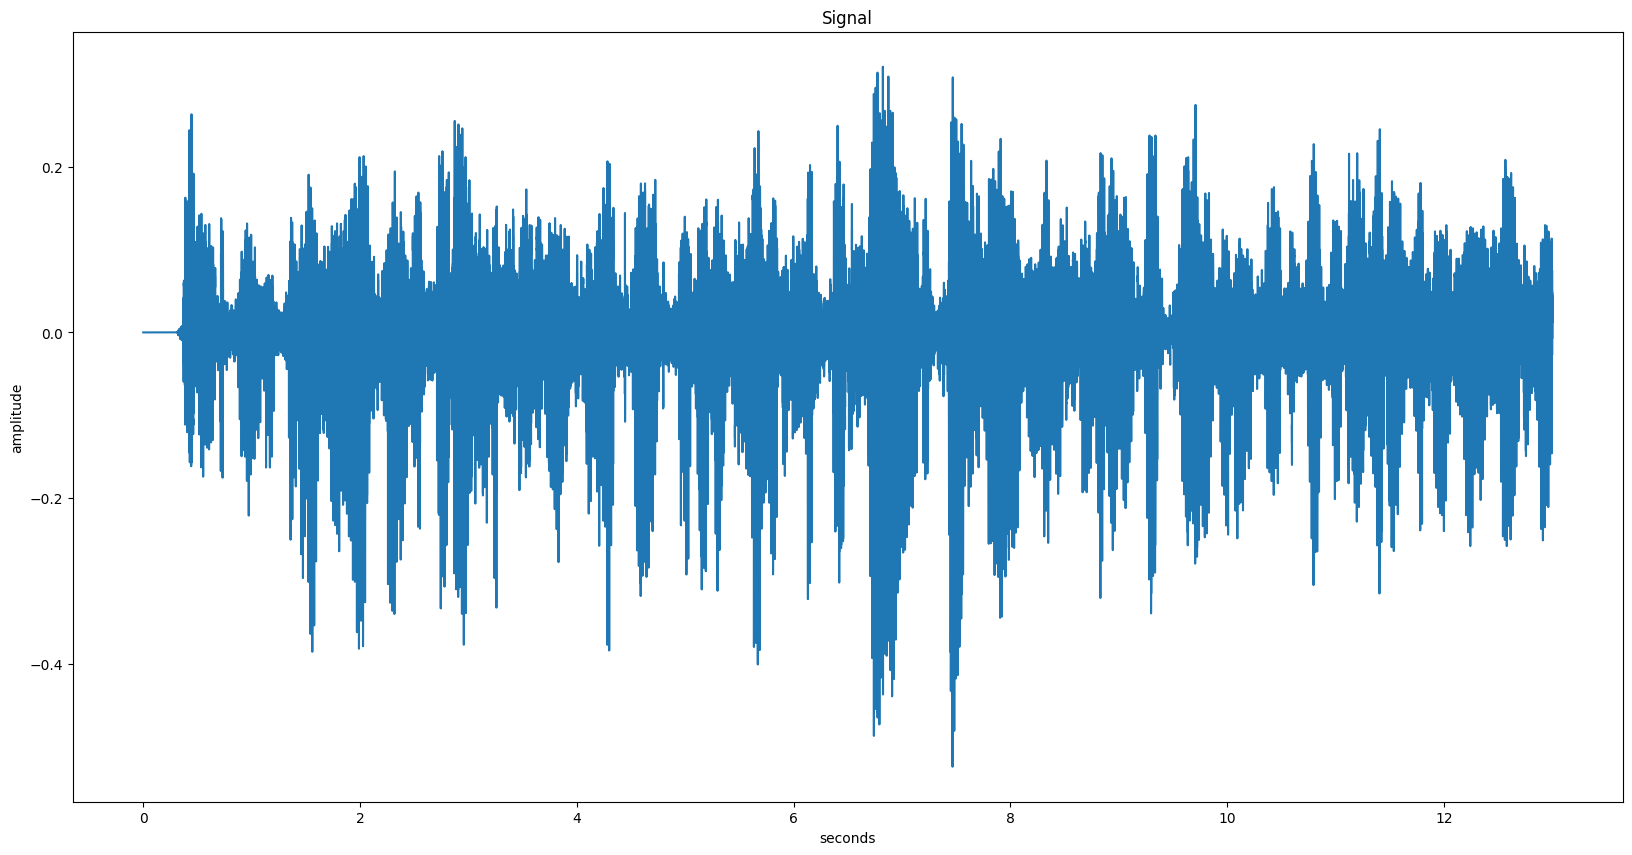

In [31]:
plt.figure(figsize=(20,10))
plt.title('Signal')
plt.plot(time,audio_13)
plt.ylabel('amplitude')
plt.xlabel('seconds')
plt.show()

Above is a waveform for the signal. Now, we can use the pad_or_trim() method to ensure the sample is in the right form for inference.

In [32]:
audio = whisper.pad_or_trim(audio_13)

Next, we plot the amplitude with respect to time with trimmed/padded audio.

In [33]:
#Number of samples in our trimmed/padded audio
n_samples =  audio.shape[-1]
#Time of each sample
time = np.linspace(0,(n_samples-1)*delta,n_samples)

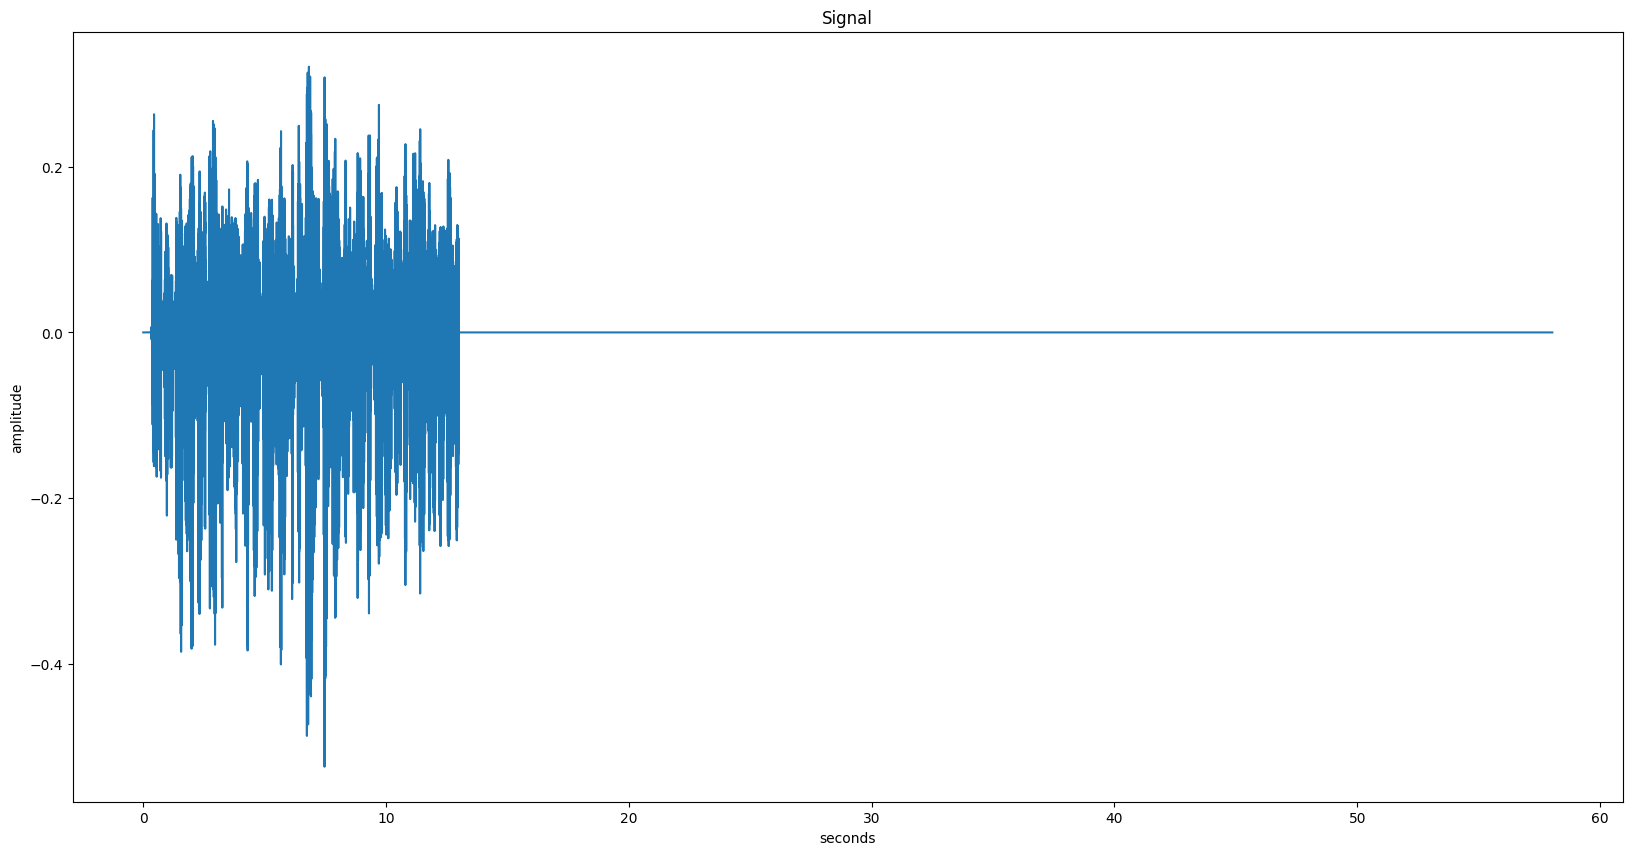

In [34]:
plt.figure(figsize=(20,10))
plt.title('Signal')
plt.plot(time,audio)
plt.ylabel('amplitude')
plt.xlabel('seconds')
plt.show()

Next, we can start plotting a mel spectogram by applying a log_mel_spectogram() funtion to our audio file. It converts the y-axis (frequency) into the mel scale:

In [35]:
mel = whisper.log_mel_spectrogram(audio).to(model_m.device)

The output above is a tensor of converted frequencies. Now, we plot 2 subplots, one is a regular representation of sound amplitude over period of time, and the other is our mel spectrogram:

Text(42.722222222222214, 0.5, 'Mel Scale')

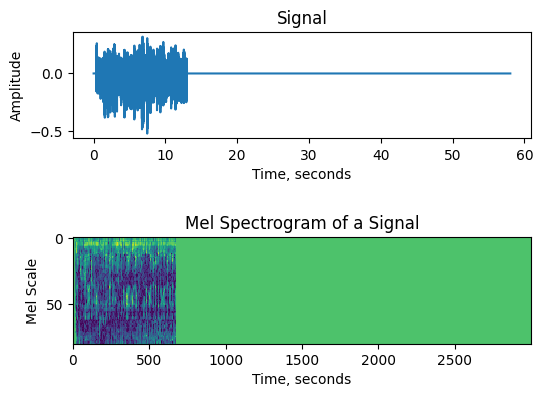

In [36]:
fig, (ax1, ax2) = plt.subplots(2)
fig.tight_layout(pad=5.0)
ax1.plot(time,audio)
ax1.set_title('Signal')
ax1.set_xlabel('Time, seconds')
ax1.set_ylabel('Amplitude')
ax2.imshow((mel.numpy()*mel.numpy())**(1/2),interpolation='nearest', aspect='auto')
ax2.set_title('Mel Spectrogram of a Signal')
ax2.set_xlabel('Time, seconds')
ax2.set_ylabel('Mel Scale')

Next, we can move on to language detection.

**Language detection**

We will listen to our audio file and detect the spoken language. The sample rate (sr) by default is 22050, which means that for every second there are 22,050 samples. We can use ipd.Audio() function to listen to our audio file.

In [37]:
sr=22050
ipd.Audio(audio, rate=sr)

Next, We can obntain the probability of each language by using detect_language() method.

In [38]:
probs = model_m.detect_language(mel)

In [39]:
probs

(tensor(50287),
 {'kk': 1.3835561674113706e-07,
  'vi': 9.708070138003677e-05,
  'cs': 1.4901805798217538e-06,
  'et': 4.159894160693511e-06,
  'tk': 1.2384499648021574e-08,
  'ps': 1.8737500795396045e-05,
  'te': 0.003228211309760809,
  'nn': 0.0017195401014760137,
  'ka': 1.1993919191155555e-09,
  'gu': 5.516450869436085e-07,
  'hu': 1.5622202909071348e-06,
  'ja': 0.0016791303642094135,
  'en': 0.0048768664710223675,
  'az': 1.985004018933978e-07,
  'zh': 0.0008606736664660275,
  'ne': 1.7518083041068166e-05,
  'lb': 2.1936039651393457e-09,
  'ms': 0.0014415137702599168,
  'tt': 1.8666155288116215e-09,
  'ba': 9.704773873409067e-09,
  'el': 8.049301686696708e-05,
  'ha': 2.1842447850417557e-08,
  'la': 0.0003857725823763758,
  'lt': 1.3350512745091692e-05,
  'am': 6.109471684112577e-08,
  'haw': 6.38099227217026e-05,
  'sr': 2.910510659148713e-07,
  'lo': 7.368716410383058e-07,
  'mg': 1.1360603124899171e-08,
  'ca': 1.641996277612634e-06,
  'as': 2.419611533355237e-08,
  'af': 2.19

From above, we can see the probability of each language being the spoken language. English has the highest probability of 98.5%, therefore it is the spoken language in the audio file.

Next, we can move on to transcription.

**Transcription**

In [40]:
transcription = model_m.transcribe(file_path, fp16 = False)['text']

In [41]:
transcription

' எல்லா recomprob ம맛다면 நாங்கள் 사람ூர் легூர்வு விரும்பி இருக்கும். கருத்துக் குண்டுப்பா больை பின்னு பிரிமை. பெரிவாநிங்கள் முண்பிதான வாடிக்கைனிdy tonight நாங்கள் பெரிவாநிக்கு.. தீட்டர் இவன் பாட்டிட்டு மருந்துயில், உ கது ப மற்றும் பேர்,'

From the transcription above, we can see our Speech-To-Text system works very well, it transcribed our audio perfectly.

As an adition, we can translate our audio file to another language.

**Translation**

We would translate our audio file to Spanish, by setting language='es'.

In [42]:
translation = model_m.transcribe(file_path, language = 'english', fp16 = False)['text']

In [43]:
translation

' Hello everyone, we are selected in the university. I am very proud of this. This is our first victory.'

Our audio file can be translated to other languages as well.

**Conclusion**

We have been able to create a Speech-To-Text application using an ASR (Automatic Speech Recognition) system, Whisper. Speech-To-Text has a variety of use cases which include transcribing audio recordings, dictation, voice commands, online search, enhanced customer service etc.